## Sobel Operator
It is used to detect edges in an image.
Following is it's working in code form along with the intuition behind it.

In [13]:
# Necessary imports
import os
import pathlib
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Following steps set the path to image directory

# Path to current directory
cwd = pathlib.Path().absolute()
# Path to parent directory of current directory
cwd_parent = cwd.parent.absolute()

image_dir = None

# Check for 'images' directory
if 'images' in os.listdir(cwd_parent):
    # Saving 'images' directory path
    image_dir = f'{cwd_parent}/images'

msg = f'\'images\' path found! "{image_dir}"' if os.path.isdir(image_dir) else 'BAD! images path not found!'
print(msg)


# NOTE: Change paths according to your file system.


'images' path found! "/Users/hanzy/Documents/Tuni/ML_Learning/CV/images"


Image read succussfully!


Text(0.5, 1.0, 'Gaussian Blurred Image')

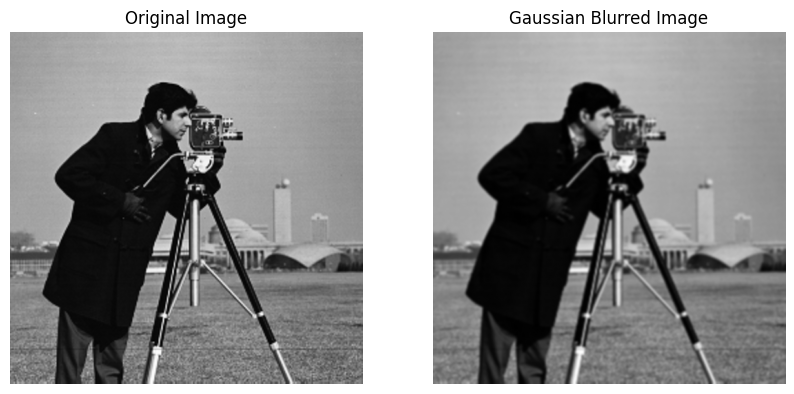

In [21]:
# Image used to perform Sobel Operator
filename = "cameraman.tif"
filepath = f"{image_dir}/standard_test_images/{filename}"

file_img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(file_img, (7, 7), 0)

print("Image read succussfully!")

plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.imshow(file_img, cmap="gray")
plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title('Gaussian Blurred Image')

# plt.show()

# Steps involved

Sobel Operator involves finding edges in following steps:
- Horizontal Edges ($S_x$)
- Vertical Edges ($S_y$)
- Calculating Magnitude ($S_m$)



## 1. Horizontal Edges ($S_x$)
Horizontal edges are found from an image applying following 3x3 kernel.

$$
\begin{bmatrix}
  -1 & -2 & -1 \\
  0 & 0 & 0 \\
  1 & 2 & 1
\end{bmatrix}
$$

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

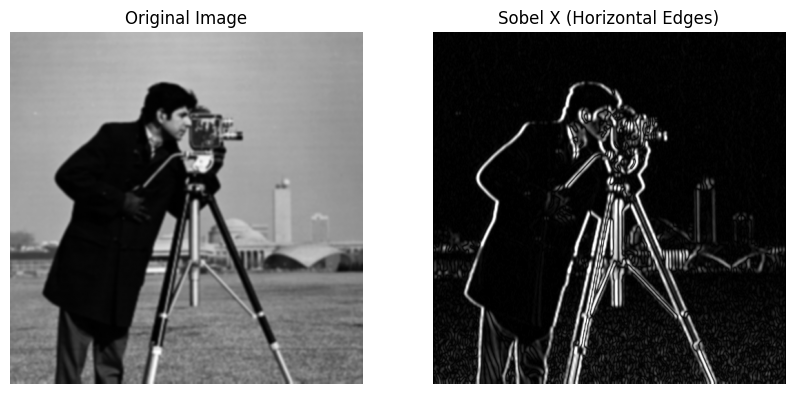

In [22]:
# Sobel for horizontal edges (dx=1, dy=0)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# Display Original Image with Horizontal Sobel Operator

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
plt.title('Sobel X (Horizontal Edges)')
plt.axis('off')

## 2. Vertical Edges ($S_y$)
Vertical edges are found from an image applying following 3x3 kernel.

$$
\begin{bmatrix}
  -1 & 0 & 1 \\
  -2 & 0 & 2 \\
  -1 & 0 & 1
\end{bmatrix}
$$

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

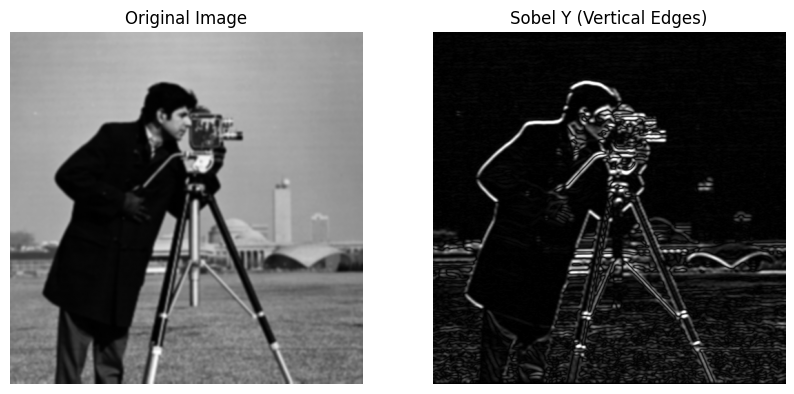

In [23]:
# Sobel for vertical edges (dx=0, dy=1)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Display Original Image with Vertical Sobel Operator

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
plt.title('Sobel Y (Vertical Edges)')
plt.axis('off')

## 3. Calculate Magnitude ($S_m$)
Both edges are combined into one as following

$$
|S_m| = \sqrt(S_x^2 + S_y^2)
$$

In [7]:
# Compute the magnitude of gradients
sobel_combined, angle = cv2.cartToPolar(sobel_x, sobel_y)
# sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)  # Another direct way of computing magnitude
sobel_combined = cv2.convertScaleAbs(sobel_combined)  # Convert to uint8 for display

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

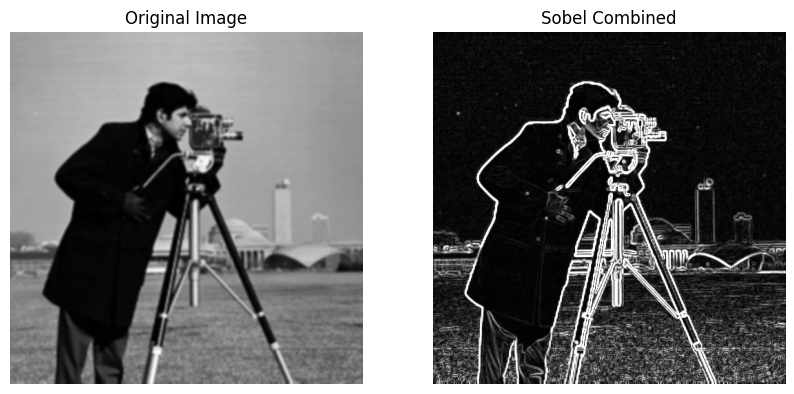

In [24]:
# Display Original Image with combined Sobel Operator Result

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

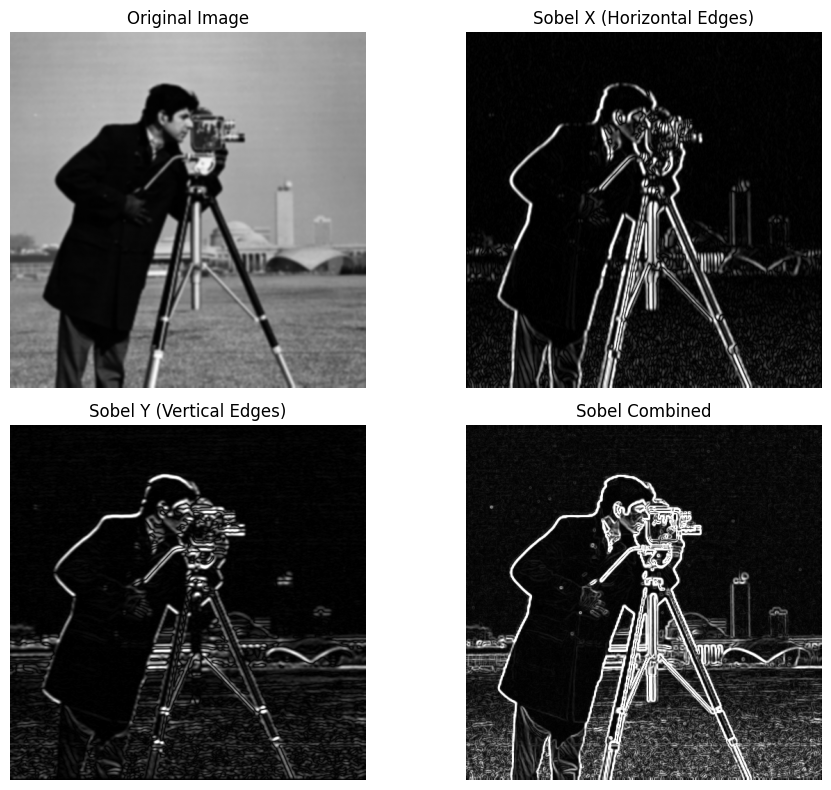

In [25]:
# Display all results combined

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
plt.title('Sobel X (Horizontal Edges)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
plt.title('Sobel Y (Vertical Edges)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.tight_layout()
plt.show()

# Sobel Edge Detector with Color-Coded Orientation

To visualize edge orientation in the Sobel edge detector, map the gradient direction to colors using the HSV color space.

## Steps

1. **Compute Gradients**:
   - Horizontal gradient: $$ S_x = \text{Sobel}_x(I) $$
   - Vertical gradient: $$ S_y = \text{Sobel}_y(I) $$
   - Sobel kernels:
     $$
     S_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}, \quad S_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
     $$

2. **Gradient Magnitude and Orientation**:
   - Magnitude: 
     $$
     |S| = \sqrt{S_x^2 + S_y^2}
     $$
   - Orientation: 
     $$
     \theta = \arctan2(S_y, S_x)
     $$
     $$ \theta \in [0, 2\pi] (radians) $$

3. **Map Orientation to Color**:
   - Normalize angle: 
     $$
     H = \theta / (2\pi) \times 360º = \theta / \pi \times 180º \space\space [360/(2\pi) = 180/\pi]
     $$ 
   - Create HSV image:
     - Hue: $ H $
     - Saturation: $ S = 1.0 $
     - Value: $ V = \text{normalize}(|S|) \in [0, 1] $
   - Convert HSV to RGB.

4. **Output**:
   - Display RGB image where hue indicates edge orientation and brightness indicates edge strength.
   <br><br><div style="text-align:center"><img src="images/HSV.png" alt="Alt Text" height="300"></div>

## Example Color Mapping
- $ \theta = 0^\circ $: Red (horizontal edges).
- $ \theta = 90^\circ $: Cyan (vertical edges).
- $ \theta = 45^\circ $: Yellow (diagonal edges).

## Notes
- Use OpenCV: `cv2.Sobel`, `cv2.cartToPolar`, `cv2.cvtColor`.
- Normalize magnitude for consistent brightness.

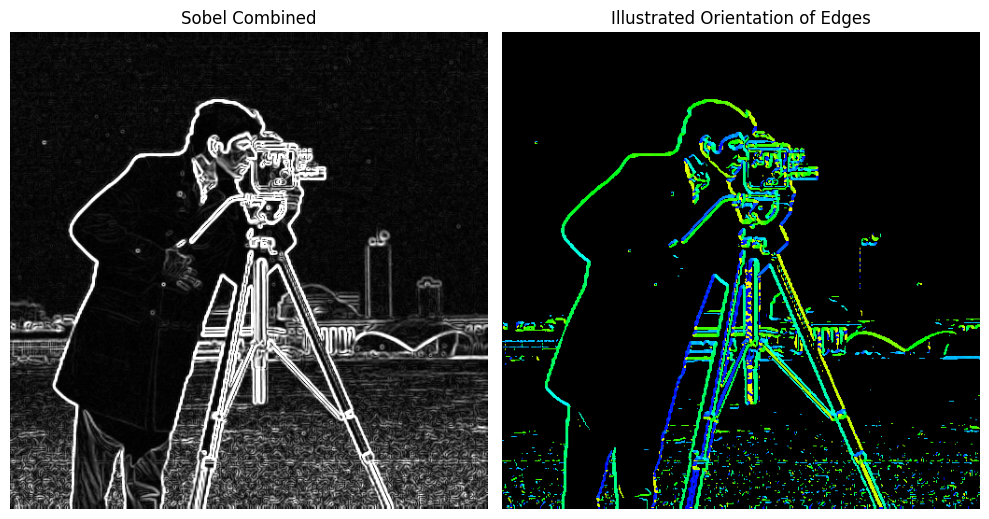

In [26]:
# Normalize angle to [0, 360] for hue
hue = angle * 180 / np.pi  # Convert radians to degrees

# Create HSV image
hsv = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.float32)

hsv[..., 0] = hue / 2  # Hue in [0, 180] for OpenCV
hsv[..., 1] = 1.0  # Full saturation
hsv[..., 2] = cv2.normalize(sobel_combined, None, 0, 1, cv2.NORM_MINMAX)  # Magnitude as value

# Convert to RGB
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb, cmap='gray')
plt.title('Illustrated Orientation of Edges')
plt.axis('off')

plt.tight_layout()
plt.show()